In [1]:
import keras

Using TensorFlow backend.


In [56]:
import numpy as np
from keras.callbacks import Callback
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
class Metrics(Callback):
    def on_train_begin(self, logs={}):
        self.val_f1s = []
        self.val_recalls = []
        self.val_precisions = []

    def on_epoch_end(self, epoch, logs={}):
        val_predict = (np.asarray(self.model.predict(self.model.validation_data[0]))).round()
        val_targ = self.model.validation_data[1]
        _val_f1 = f1_score(val_targ, val_predict)
        _val_recall = recall_score(val_targ, val_predict)
        _val_precision = precision_score(val_targ, val_predict)
        self.val_f1s.append(_val_f1)
        self.val_recalls.append(_val_recall)
        self.val_precisions.append(_val_precision)
        print (_val_f1, _val_precision, _val_recall)
        return

metrics = Metrics()

In [11]:
import numpy as np

In [1]:
with open("sentence_test") as f:
    content = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content = [x.strip() for x in content] 

In [2]:
len(content)

3059

In [3]:
content

['Her pain was under good control with PO pain medications and she was deemed suitable for discharge',
 'She had a postoperative CT scan that revealed partial decompression of the spinal canal and good placement of her hardware',
 'Percocet  5325  12 tabs PO prn pain',
 'PRINCIPAL DIAGNOSIS  C56 disc herniation with cord compression and myelopathy',
 'PRINCIPAL DIAGNOSIS  C56 disc herniation with cord compression and myelopathy',
 'She had a workup by her neurologist and an MRI revealed a C56 disc herniation with cord compression and a T2 signal change at that level',
 'She had a workup by her neurologist and an MRI revealed a C56 disc herniation with cord compression and a T2 signal change at that level',
 'She had a workup by her neurologist and an MRI revealed a C56 disc herniation with cord compression and a T2 signal change at that level',
 'She had a workup by her neurologist and an MRI revealed a C56 disc herniation with cord compression and a T2 signal change at that level',
 '

In [4]:
with open("labels_test") as f:
    label = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
labels = [x.strip() for x in label]

In [5]:
labels


['TrIP',
 'TeRP',
 'TrAP',
 'PIP',
 'PIP',
 'PIP',
 'TeRP',
 'TeRP',
 'TeRP',
 'TeCP',
 'TrAP',
 'PIP',
 'TeCP',
 'TrAP',
 'TrAP',
 'PIP',
 'PIP',
 'TrAP',
 'TrAP',
 'TeCP',
 'TeRP',
 'TeRP',
 'PIP',
 'PIP',
 'PIP',
 'TrAP',
 'TrAP',
 'TrAP',
 'TrAP',
 'TrAP',
 'TrAP',
 'TrAP',
 'PIP',
 'PIP',
 'PIP',
 'PIP',
 'TrAP',
 'PIP',
 'PIP',
 'PIP',
 'TeRP',
 'TeRP',
 'TeCP',
 'TrAP',
 'TeCP',
 'TrAP',
 'TrAP',
 'TrAP',
 'TeRP',
 'TeRP',
 'PIP',
 'TrAP',
 'PIP',
 'TrAP',
 'TrAP',
 'TrAP',
 'TeRP',
 'TeRP',
 'PIP',
 'TrAP',
 'PIP',
 'TeCP',
 'TrAP',
 'TrAP',
 'TrAP',
 'TeRP',
 'TeRP',
 'TeRP',
 'TrAP',
 'TrAP',
 'TrAP',
 'TeRP',
 'TeRP',
 'PIP',
 'PIP',
 'PIP',
 'TeRP',
 'TrAP',
 'TeCP',
 'TrCP',
 'TrAP',
 'TrAP',
 'PIP',
 'PIP',
 'PIP',
 'TeRP',
 'TeRP',
 'TeRP',
 'PIP',
 'TeRP',
 'TeRP',
 'TeRP',
 'TrAP',
 'TeRP',
 'PIP',
 'TeRP',
 'TeRP',
 'TeRP',
 'PIP',
 'PIP',
 'TeRP',
 'TeRP',
 'TrNAP',
 'TrNAP',
 'PIP',
 'PIP',
 'TeRP',
 'TeRP',
 'PIP',
 'TeRP',
 'PIP',
 'TeRP',
 'PIP',
 'TeCP',
 'TeCP'

In [6]:
len(content)

3059

In [8]:
# First, build an index of all tokens in the data.
token_index = {}
for sample in content:
    # We simply tokenize the samples via the `split` method.
    # in real life, we would also strip punctuation and special characters
    # from the samples.
    for word in sample.split():
        if word not in token_index:
            # Assign a unique index to each unique word
            token_index[word] = len(token_index) + 1
            # Note that we don't attribute index 0 to anything.

In [9]:
token_index

{'Her': 1,
 'pain': 2,
 'was': 3,
 'under': 4,
 'good': 5,
 'control': 6,
 'with': 7,
 'PO': 8,
 'medications': 9,
 'and': 10,
 'she': 11,
 'deemed': 12,
 'suitable': 13,
 'for': 14,
 'discharge': 15,
 'She': 16,
 'had': 17,
 'a': 18,
 'postoperative': 19,
 'CT': 20,
 'scan': 21,
 'that': 22,
 'revealed': 23,
 'partial': 24,
 'decompression': 25,
 'of': 26,
 'the': 27,
 'spinal': 28,
 'canal': 29,
 'placement': 30,
 'her': 31,
 'hardware': 32,
 'Percocet': 33,
 '5325': 34,
 '12': 35,
 'tabs': 36,
 'prn': 37,
 'PRINCIPAL': 38,
 'DIAGNOSIS': 39,
 'C56': 40,
 'disc': 41,
 'herniation': 42,
 'cord': 43,
 'compression': 44,
 'myelopathy': 45,
 'workup': 46,
 'by': 47,
 'neurologist': 48,
 'an': 49,
 'MRI': 50,
 'T2': 51,
 'signal': 52,
 'change': 53,
 'at': 54,
 'level': 55,
 'Immediately': 56,
 'postop': 57,
 'exam': 58,
 'only': 59,
 'improved': 60,
 'slightly': 61,
 'in': 62,
 'hyperreflexia': 63,
 'F': 64,
 'DM': 65,
 'COPD': 66,
 'on': 67,
 '2L': 68,
 'NC': 69,
 'Bipap': 70,
 'night': 

In [13]:
max_length = 50

# This is where we store our results:
results = np.zeros((len(content), max_length, max(token_index.values()) + 1))
for i, sample in enumerate(content):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1.

In [16]:
results.shape

(3059, 50, 5501)

In [33]:
from keras.preprocessing.text import Tokenizer



# We create a tokenizer, configured to only take
# into account the top-1000 most common words
tokenizer = Tokenizer(num_words=10000)
# This builds the word index
tokenizer.fit_on_texts(content)

# This turns strings into lists of integer indices.
sequences = tokenizer.texts_to_sequences(content)

# You could also directly get the one-hot binary representations.
# Note that other vectorization modes than one-hot encoding are supported!
one_hot_results = tokenizer.texts_to_matrix(content, mode='binary')

# This is how you can recover the word index that was computed
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 4763 unique tokens.


In [20]:
word_index

{'and': 1,
 'the': 2,
 'of': 3,
 'to': 4,
 'with': 5,
 'a': 6,
 'was': 7,
 'for': 8,
 'in': 9,
 'on': 10,
 'patient': 11,
 'no': 12,
 'left': 13,
 'which': 14,
 'an': 15,
 'he': 16,
 'as': 17,
 'at': 18,
 'is': 19,
 'right': 20,
 'or': 21,
 'his': 22,
 'her': 23,
 'showed': 24,
 'she': 25,
 'that': 26,
 'had': 27,
 'revealed': 28,
 'history': 29,
 'were': 30,
 'this': 31,
 'pain': 32,
 'by': 33,
 'ct': 34,
 'chest': 35,
 'be': 36,
 'status': 37,
 'from': 38,
 'but': 39,
 'disease': 40,
 'post': 41,
 'well': 42,
 'has': 43,
 'po': 44,
 'likely': 45,
 'also': 46,
 'secondary': 47,
 'bilateral': 48,
 'have': 49,
 'scan': 50,
 'mg': 51,
 'normal': 52,
 'blood': 53,
 'pulmonary': 54,
 'mild': 55,
 'hospital': 56,
 'ventricular': 57,
 'artery': 58,
 'discharge': 59,
 'not': 60,
 'due': 61,
 'admission': 62,
 'there': 63,
 'evidence': 64,
 'pleural': 65,
 'examination': 66,
 'edema': 67,
 'coronary': 68,
 'consistent': 69,
 '2': 70,
 'given': 71,
 'cardiac': 72,
 'started': 73,
 'xray': 74,
 

In [22]:
one_hot_results[1]

array([0., 1., 1., ..., 0., 0., 0.])

In [30]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
trans_label = encoder.fit_transform(labels)

In [32]:
trans_label.shape

(3059, 8)

In [35]:
one_hot_results.shape[1]

10000

!pip install scikit-learn

In [40]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(one_hot_results.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(8, activation='softmax'))

In [57]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [58]:
x_val = one_hot_results[:2000]
partial_x_train = one_hot_results[2000:]

y_val = trans_label[:2000]
partial_y_train = trans_label[2000:]


In [62]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 1059 samples, validate on 2000 samples
Epoch 1/20
1059/1059 [==============================] - 0s 230us/step - loss: 0.4404 - acc: 0.8414 - val_loss: 1.1755 - val_acc: 0.6370
Epoch 2/20
1059/1059 [==============================] - 0s 211us/step - loss: 0.4134 - acc: 0.8414 - val_loss: 1.2039 - val_acc: 0.6010
Epoch 3/20
1059/1059 [==============================] - 0s 209us/step - loss: 0.3931 - acc: 0.8461 - val_loss: 1.2189 - val_acc: 0.5995
Epoch 4/20
1059/1059 [==============================] - 0s 217us/step - loss: 0.3916 - acc: 0.8423 - val_loss: 1.2116 - val_acc: 0.6230
Epoch 5/20
1059/1059 [==============================] - 0s 216us/step - loss: 0.3723 - acc: 0.8489 - val_loss: 1.2217 - val_acc: 0.5960
Epoch 6/20
1059/1059 [==============================] - 0s 215us/step - loss: 0.3608 - acc: 0.8517 - val_loss: 1.2770 - val_acc: 0.5690
Epoch 7/20
1059/1059 [==============================] - 0s 216us/step - loss: 0.3639 - acc: 0.8480 - val_loss: 1.2184 - val_acc: 0.6070


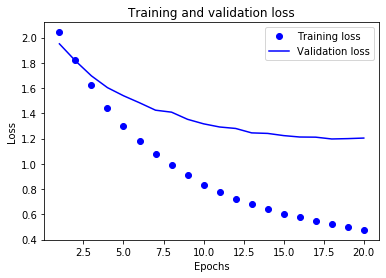

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

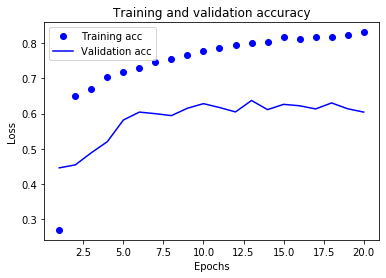

In [45]:

plt.clf()   # clear figure

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [47]:
sum(trans_label)

array([740, 164, 976, 867, 177,  49,  62,  24])

In [63]:
val_acc

[0.44550000023841857,
 0.45399999713897704,
 0.4884999947547913,
 0.52,
 0.5814999980926514,
 0.6039999966621399,
 0.5994999995231628,
 0.5939999995231628,
 0.6150000009536744,
 0.6279999985694885,
 0.6169999976158143,
 0.6045000052452087,
 0.6369999957084655,
 0.610999997138977,
 0.6259999952316284,
 0.6220000009536744,
 0.6129999933242798,
 0.6299999947547913,
 0.613499993801117,
 0.6039999933242798]

In [73]:
prediction = model.predict(x_val)

In [69]:
y_val

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [78]:
pred = np.argmax(prediction, axis=1)

In [79]:
pred

array([3, 2, 3, ..., 2, 2, 2])

In [81]:
 np.argmax(trans_label[:2000], axis=1)

array([5, 2, 3, ..., 2, 2, 0])